In [1]:
import NSLib2 as l
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

C:\Users\USER\AppData\Local\Temp\ipykernel_18912\1250516321.py:12: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * t)



DOF: 8
Lifetime: 473.56675752523284 ± 55.28239131380527
Chi square: 17.500389771867532
Reduced chi-square: 2.1875487214834415
Chi square critical (From PDF): 15.507
Fit acceptable at 5% level of significance: False



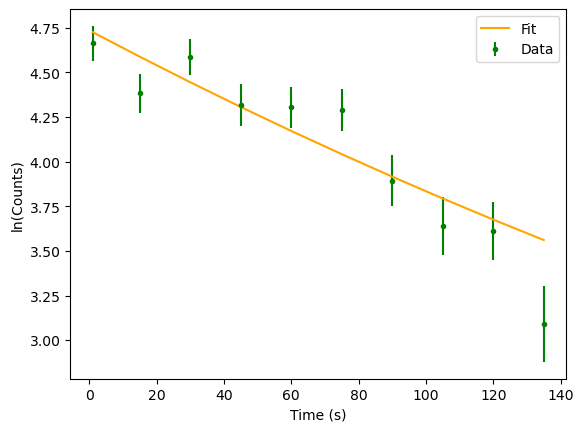

In [2]:
#Question 1

data = pd.read_csv('Q1_endsemfit.txt', header=None, delim_whitespace=True)

time=np.array(data[0])
counts=data[1]
uncertainity_in_counts = data[2]


# Define the exponential decay function
def func(t, a, b):
	return a * np.exp(-b * t)

# Convert counts to natural logarithm and calculate its uncertainty
ln_counts = np.log(counts)
sigma_ln_counts = 1 / np.sqrt(counts)

# Use curve_fit to fit the exponential decay function to the data
popt, pcov = curve_fit(func, time, ln_counts, sigma=sigma_ln_counts, absolute_sigma=True)

lifetime = 1 / popt[1]
error_lifetime = np.sqrt(np.diag(pcov))[1] / popt[1]**2

# Calculate the chi-square statistic and the reduced chi-square statistic
chi_square = np.sum(((ln_counts - func(time, *popt)) / sigma_ln_counts) ** 2)
reduced_chi_square = chi_square / (len(time) - len(popt))

# Determine if the fit is acceptable at the 5% level of significance
degrees_of_freedom = len(time) - len(popt)

chi_square_critical = 15.507 #given
fit_acceptable = chi_square <= chi_square_critical

print()
print('DOF:',degrees_of_freedom)
print(f"Lifetime: {lifetime} ± {error_lifetime}")
print('Chi square:',chi_square)
print(f"Reduced chi-square: {reduced_chi_square}")
print(f"Chi square critical (From PDF): {chi_square_critical}")
print(f"Fit acceptable at 5% level of significance: {fit_acceptable}")
print()

# Plot the data and the fit
plt.errorbar(time, ln_counts, yerr=sigma_ln_counts, fmt='.',color='g', label='Data')
popt = np.array(popt)
fit = func(time, *popt)
fit = np.array(fit)
plt.plot(time, fit,color='orange', label='Fit')
plt.xlabel('Time (s)')
plt.ylabel('ln(Counts)')
plt.legend()
plt.show()

First:
Volume: 3.9299460080936357
Second:
Volume: 0.18569418599227414



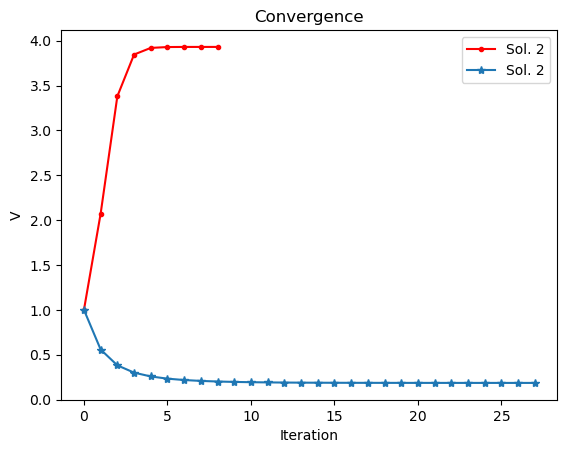

'\nSolutions with different fixed-point it. are different,because the van der Waals equation is a cubic equation in V, and cubic equations can have up to three real roots. \n\n'

In [3]:
#Question 2

# Constants
p = 5.95
R = 0.0821
T = 300
a = 6.254
b = 0.05422

print("First:")

# On rearranging 
def f1(V):
	return ((R * T) / (p + a/V**2)) + b

# Initial guess
V = 1
V_values1 = [V]

# Iteratively compute V
while True:
	V_next = f1(V)
	if abs(V_next - V) < 1e-5:
		break
	V = V_next
	V_values1.append(V)


print(f"Volume: {V}")


print("Second:")

# On rearranging 
def f2(V):
	return np.sqrt(((R * T)/(V - b) - p)**-1) * np.sqrt(a)

# Changing Initial Guess
V = 1
V_values2 = [V]

# Compute V by iteraion
while True:
	V_next = f2(V)
	if abs(V_next - V) < 1e-5:
		break
	V = V_next
	V_values2.append(V)


print(f"Volume: {V}")
print()

plt.figure()
plt.plot(V_values1,'.-', color = 'r', label = 'Sol. 2')
plt.plot(V_values2,'*-', label= 'Sol. 2')
plt.title('Convergence')
plt.xlabel('Iteration')
plt.ylabel('V')
plt.legend()
plt.show()

'''
Solutions with different fixed-point it. are different,because the van der Waals equation is a cubic equation in V, and cubic equations can have up to three real roots. 

'''

In [4]:
#Question 5

# Load the matrix
A = np.loadtxt('Q5_endsemmat.txt')

# Print the matrix
print("Given Matrix:")
print(A)
print()


# Get the first two largest eigenvalues and their corresponding eigenvectors
eigenvalues = []
eigenvectors = []
A_n = A

for _ in range(2):
    
	eigenvalue, eigenvector = l.power_method(A_n, 500)
	eigenvalues.append(eigenvalue)
	eigenvectors.append(eigenvector)

	# Deflate the matrix
	A_n = A_n - eigenvalue * np.outer(eigenvector, eigenvector)

# Print the eigenvalues and eigenvectors
for i in range(2):
	print(f"Eigenvalue {i+1}: {eigenvalues[i]}")
	print(f"Eigenvector {i+1}: {eigenvectors[i]}")
	print()




Given Matrix:
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]

Eigenvalue 1: 3.7320508075688776
Eigenvector 1: [-0.28867513  0.5        -0.57735027  0.5        -0.28867513]

Eigenvalue 2: 3.0000000000000004
Eigenvector 2: [ 5.0000000e-01 -5.0000000e-01  1.2952602e-16  5.0000000e-01
 -5.0000000e-01]



Success probability: 0.48389828458058115


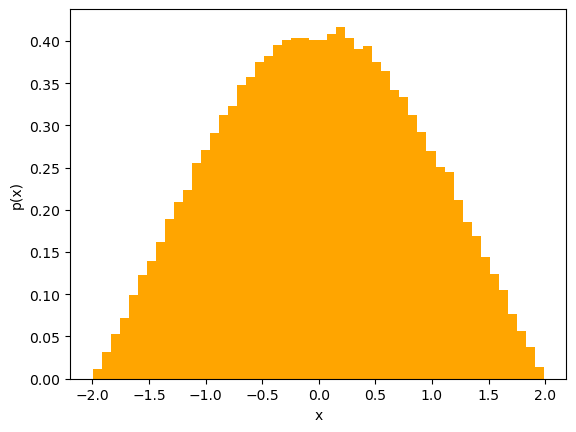

In [5]:
#Question 6

#p(x) = 0.5*(a**2 - x**2) for -a<=x<=a and a = 2 and zero elsewhere

# Constants
a = 2
N = 100000  # number of samples to generate

# Target distribution
def p(x):
	return 0.5 * (a**2 - x**2) if abs(x) < a else 0

# Generate samples
samples = []
num_rejected = 0
while len(samples) < N:
	x = np.random.normal(0, a)  # sample from Gaussian distribution
	u = np.random.uniform(0, 0.5 * a**2)  # uniform random number
	if u < p(x):
		samples.append(x)
	else:
		num_rejected += 1

# Print success probability
print(f"Success probability: {N / (N + num_rejected)}")

# Plot histogram of samples
plt.hist(samples, bins=50, density=True, color='orange')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()



Expectation value of Hamiltonian:
a = 0.1: E = 2.6207
a = 0.2: E = 1.1742
a = 0.3: E = 0.8228
a = 0.4: E = 0.5683
a = 0.5: E = 0.4948
a = 0.6: E = 0.4491
a = 0.7: E = 0.3491
a = 0.7999999999999999: E = 0.2983
a = 0.8999999999999999: E = 0.274
a = 0.9999999999999999: E = 0.2791
a = 1.0999999999999999: E = 0.231
a = 1.2: E = 0.2277
a = 1.3: E = 0.202
a = 1.4: E = 0.1796
a = 1.5: E = 0.1617
a = 1.5999999999999999: E = 0.1251
a = 1.7: E = 0.117
a = 1.8: E = 0.1255
a = 1.9: E = 0.1424
a = 2.0: E = 0.1258


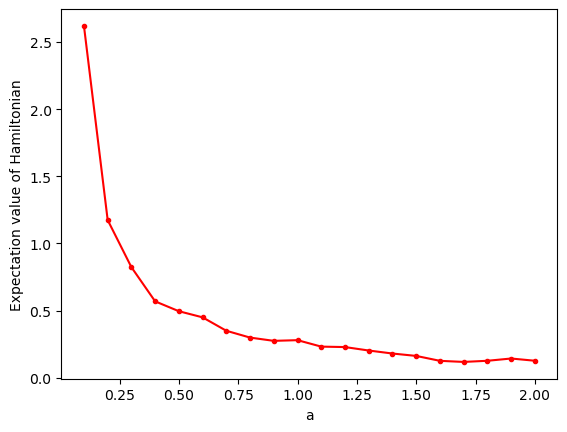

In [6]:
#Q7

# Constants
m = 1  # mass
omega = 1  # frequency
N = 20000  # number of Monte Carlo steps
a_values = np.linspace(0.1, 2.0, 20)  # variational parameters

# Trial wavefunction and its derivative
def psi(x, a):
	return np.exp(-a * x**2)

def psi_prime(x, a):
	return -2 * a * x * np.exp(-a * x**2)

# Hamiltonian
def H(x, a):
	kinetic = -0.5 * psi_prime(x, a) / psi(x, a)
	potential = 0.5 * m * omega**2 * x**2
	return kinetic + potential

# Monte Carlo step
def step(x, delta=1.0):
	return x + delta * (2 * np.random.rand() - 1)

# Initialize position
x = 0.0

E_a = []
# Perform Monte Carlo simulation for each variational parameter
for a in a_values:
	E_total = 0.0
	for i in range(N):
		x_new = step(x)
		if np.random.rand() < psi(x_new, a) / psi(x, a):
			x = x_new
		E_total += H(x, a)

	# Calculate expectation value of Hamiltonian
	E = np.round((E_total / N),4)

	E_a.append(E)

	#print(f"Expectation value of Hamiltonian for a = {a}: {E}")

print('Expectation value of Hamiltonian:')
for i in range(len(a_values)):
	print(f"a = {a_values[i]}: E = {E_a[i]}")

#plot E_a vs a
plt.plot(a_values, E_a, '.-',color='r')
plt.xlabel('a')
plt.ylabel('Expectation value of Hamiltonian')
plt.show()